i wanted to test if my alternative coordinate system has constant/static basis vector, whether due to linearity measuring distances will drop integrals and whether whole process will reduce to
$$\vec{x}^T G \vec{x}$$

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.abc import u,v
from sympy import lambdify, Matrix, MatMul
from sympy.vector import CoordSys3D, gradient
from plots.aj_plt_templates import draw_basis
C = CoordSys3D('C')
x,y,z = C.x,C.y,C.z


In [2]:
eu = 1 * C.i - 1 * C.j + 0 * C.k
ev = 1 * C.i + 1 * C.j - 2 * C.k
u_vec = (u*eu).to_matrix(C); v_vec = (v*ev).to_matrix(C)


In [3]:
u_f = lambdify((u,v),u_vec)
v_f = lambdify((u,v),v_vec)
def point(uv):
    return (u_f(*uv) + v_f(*uv)).flatten()
point((1,0)), np.dot(point((1,0)), point((0,1)))

(array([ 1, -1,  0]), 0)

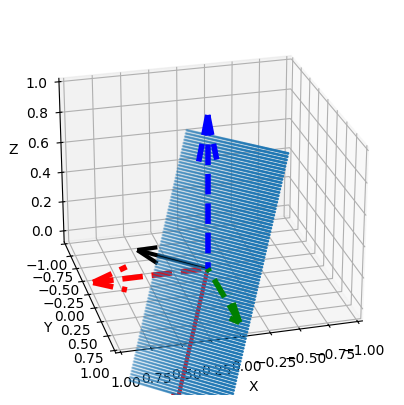

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), subplot_kw=dict(projection='3d'))
ax = [ax]
point_size = 5
draw_basis(ax[0], ls=['dashed']*3, linewidth = 4, lbls = ['$e_x^\prime$', '$e_y^\prime$','$e_z^\prime$'])
ax[0].quiver(0,0,0, *point((1,0)), linewidth = 3, length  = 0.5, color = 'k')
ax[0].quiver(0,0,0, *point((0,1)), linewidth = 3, length  = 0.5, color = 'r')
ax[0].set_xlim(-1,1)
ax[0].set_ylim(-1,1)
ax[0].view_init(elev=25, azim=75, roll=0)

dom = np.linspace(-0.35,0.35,80)
X,Y = np.meshgrid(dom,dom,sparse=True)

pts = []

for x in X.flatten():
    for y in Y.flatten():
        pts.append(point((x,y)))
ax[0].scatter(*np.array(pts).T, s = 1);

In [36]:
G = Matrix(
    [[eu.dot(eu),eu.dot(ev)],
     [ev.dot(eu),ev.dot(ev)]], dtype = float)
du = (eu).to_matrix(C)
#du.T @ G @ du
#G @ du
